In [18]:
# Amanda's Code - Source: Indeed Web Scraped 4/30/21 - 
# Michigan Data-Related Jobs and US Remote Data Analysts Jobs Analysis

# Import libraries

# WHEN RUNNING THIS - BE SURE TO USE YOUR OWN GOOGLE MAPS API KEY

import os
import pandas as pd
import numpy as np
from geopy.geocoders import GoogleV3
import sys
sys.path.append("..")
from config import g_key
import gmaps
import matplotlib.pyplot as plt

In [19]:
# Map the csv pathway
mi_data_path = "Resources/input_folder/Indeed_Current_MI_Data_Jobs.csv"

# Read the data and the study results
mi_df = pd.read_csv(mi_data_path)
mi_df.head()

,job,title,location,company,summary,salary,url
0,2,Data Analyst - Performance Improvement Operations,"Warren, MI 48092",Ascension,Understand data storage and data sharing metho...,NaN,https://indeed.com/rc/clk?jk=59d75e5a0e274fb2&...
1,3,Data Scientist,"Detroit, MI 48226 (Downtown area)",Amrock,Drive the collection of new data and the refin...,NaN,https://indeed.com/rc/clk?jk=919e248dbcc22a00&...
2,5,Data Analyst,"Southfield, MI 48033",Beaumont Services Center,Supplies data analysis to senior and executive...,NaN,https://indeed.com/rc/clk?jk=787c987acbe81130&...
3,10,Cyber Security Insider Threat and Data Loss Pr...,"Dearborn, MI",Ford Motor Company,Analyze global data loss prevention data to pr...,NaN,https://indeed.com/rc/clk?jk=4c247dd54e57a81d&...
4,12,Data Management Administrator,"Lansing, MI",Pearson,Promotes data governance in the pursuit for ex...,NaN,https://indeed.com/rc/clk?jk=74c5512f821b41aa&...


In [20]:
# ~~~~~ Data Cleaning ~~~~~
# Drop the job number and summary columns
sub_df = mi_df.drop(["job", "summary", "salary"], axis=1)

# Remove any rows with Michigan only as the location, we want the city!
sub_df = sub_df[sub_df.location != "Michigan"]

# Splits the string and select only the first element (keeping the city)
sub_df["location"] = [x.split(",")[0] for x in sub_df["location"]]

# Add "MI" to the location string
sub_df["location"] = sub_df["location"].astype(str) + ", MI"

# Make all column headers titlecase
sub_df.columns = [x.title() for x in sub_df.columns]

In [21]:
# Use the GoogleV3 geolocator
geolocator = GoogleV3(g_key)

# Creates a FOR LOOP to grab an input city, iterate to evaluate,
# and output two columns for each: latitude and longitude

# Loops over the DF
for index, row in sub_df.iterrows():

    # Initiates geocode function
    location = geolocator.geocode(row["Location"], timeout=10)
    
    # Locates the location and gets an output lat & lng
    sub_df.loc[index,"Latitude"] = location.latitude
    sub_df.loc[index,"Longitude"] = location.longitude
    
sub_df

,Title,Location,Company,Url,Latitude,Longitude
0,Data Analyst - Performance Improvement Operations,"Warren, MI",Ascension,https://indeed.com/rc/clk?jk=59d75e5a0e274fb2&...,42.514457,-83.014653
1,Data Scientist,"Detroit, MI",Amrock,https://indeed.com/rc/clk?jk=919e248dbcc22a00&...,42.331427,-83.045754
2,Data Analyst,"Southfield, MI",Beaumont Services Center,https://indeed.com/rc/clk?jk=787c987acbe81130&...,42.473369,-83.221873
3,Cyber Security Insider Threat and Data Loss Pr...,"Dearborn, MI",Ford Motor Company,https://indeed.com/rc/clk?jk=4c247dd54e57a81d&...,42.322260,-83.176314
4,Data Management Administrator,"Lansing, MI",Pearson,https://indeed.com/rc/clk?jk=74c5512f821b41aa&...,42.732535,-84.555535
...,...,...,...,...,...,...
70,Small Commercial Market Analyst,"Howell, MI",The Hanover Insurance Group,https://indeed.com/rc/clk?jk=2dd05cd1ca08bff7&...,42.607255,-83.929395
71,Machine Learning Engineer,"Ann Arbor, MI",Bodhala,https://indeed.com/rc/clk?jk=204655d576e473e6&...,42.280826,-83.743038
72,Systems Analyst,"Livonia, MI",Saameeri,https://indeed.com/rc/clk?jk=3b3b9dab9afd8650&...,42.368370,-83.352710
73,098: Data Engineer,"Ann Arbor, MI",Dataspace,https://indeed.com/rc/clk?jk=e6833ad88a380931&...,42.280826,-83.743038


In [22]:
# Re-orders the columns
sorted_df = sub_df[["Title", "Company", "Location", "Latitude", "Longitude", "Url"]]

In [23]:
# Builds a final DataFrame
location_groupby = sorted_df.groupby("Location")

job_count = location_groupby["Title"].count()
one_lat = location_groupby["Latitude"].first()
one_long = location_groupby["Longitude"].first()
one_url = location_groupby["Url"].first()

final_df = pd.DataFrame(
    {
        "Job Count": job_count,
        "Latitude": one_lat,
        "Longitude": one_long,
        "URL": one_url
    }
)

# Find highest count for the max intensity
max_count = final_df["Job Count"].max()
print(f"The max job count of any one city in Michigan is {max_count}"
      " on Indeed.")

# Establish weight of the heat layer
weight = final_df["Job Count"]

final_df

The max job count of any one city in Michigan is 20 on Indeed.


,Job Count,Latitude,Longitude,URL
Location,,,,
"Ann Arbor, MI",10,42.280826,-83.743038,https://indeed.com/rc/clk?jk=9304dea518be3ea8&...
"Battle Creek, MI",2,42.321152,-85.179714,https://indeed.com/rc/clk?jk=9eba4daa2869730c&...
"Canton, MI",1,42.308644,-83.482116,https://indeed.com/rc/clk?jk=ae003afcde13b7fe&...
"Dearborn, MI",7,42.322260,-83.176314,https://indeed.com/rc/clk?jk=4c247dd54e57a81d&...
"Detroit, MI",20,42.331427,-83.045754,https://indeed.com/rc/clk?jk=919e248dbcc22a00&...
"Farmington Hills, MI",2,42.498994,-83.367717,https://indeed.com/rc/clk?jk=7ba4b43fdd2b2620&...
"Farmington, MI",1,42.464480,-83.376322,https://indeed.com/rc/clk?jk=46546634a95ac8c0&...
"Flint, MI",2,43.012527,-83.687456,https://indeed.com/company/GENESEE-HEALTH-SYST...
"Grand Rapids, MI",1,42.963360,-85.668086,https://indeed.com/rc/clk?jk=d18a0fffaf5467b2&...


In [24]:
# Creates a new DF with the three locations with most job openings

top_3_symbol_df = final_df.nlargest(3, "Job Count", keep="first")
top_3_symbol_df

,Job Count,Latitude,Longitude,URL
Location,,,,
"Detroit, MI",20,42.331427,-83.045754,https://indeed.com/rc/clk?jk=919e248dbcc22a00&...
"Ann Arbor, MI",10,42.280826,-83.743038,https://indeed.com/rc/clk?jk=9304dea518be3ea8&...
"Dearborn, MI",7,42.322260,-83.176314,https://indeed.com/rc/clk?jk=4c247dd54e57a81d&...


In [25]:
# Configures gmaps
gmaps.configure(api_key=g_key)

# Uses the template to create the text setup for the markers
info_box_template = """
<dl>
<dt>Job</dt><dd>{Title}</dd>
<dt>Company</dt><dd>{Company}</dd>
<dt>City</dt><dd>{Location}</dd>
<dt>URL</dt><dd>{Url}</dd>
</dl>
"""

# Stores the information for each marker
job_info = [
    info_box_template.format(**row) for index, row in sorted_df.iterrows()
]

# Stores data for map layers
locations_heat = final_df[["Latitude", "Longitude"]]
locations_marker = sorted_df[["Latitude", "Longitude"]]
locations_symbol = top_3_symbol_df[["Latitude", "Longitude"]]

# Adds layers on top of gmap
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_heat,
                                 weights=weight,
                                 dissipating=True,
                                 max_intensity=10,
                                 point_radius=75                                
                                )

symbol_layer = gmaps.symbol_layer(locations_symbol, 
                                  fill_color="yellow", 
                                  stroke_color="blue", 
                                  scale=6)

marker_layer = gmaps.marker_layer(locations_marker,
                                  info_box_content=job_info)
# Displays figure
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
fig.add_layer(symbol_layer)
fig

Figure(layout=FigureLayout(height='420px'))

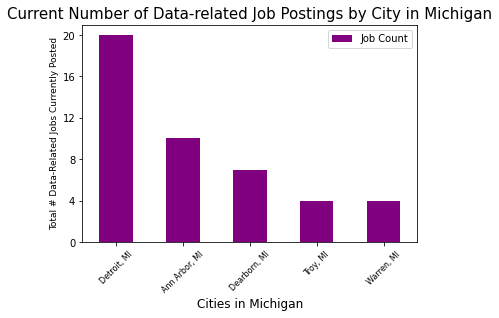

<Figure size 432x288 with 0 Axes>

In [26]:
# Bar chart 1 - Jobs by City in MI
city_job_df = final_df[["Job Count", "URL"]]

city_job_count = city_job_df.nlargest(5, "Job Count", keep="all")

# Plots the bar chart using pandas
measurements_bar = city_job_count.plot(kind="bar", 
                                       figsize=(6,4), 
                                       facecolor="purple", 
                                       align="center", 
                                       fontsize="8", 
                                       rot=45)
# Sets y-axis ticks 
plt.yticks(np.arange(0, 22, 4)) 
plt.xticks(size=8)
plt.yticks(size=10)

# Formats - title and axes
plt.title("Current Number of Data-related "  
          "Job Postings by City in Michigan", size=15)
plt.xlabel("Cities in Michigan", size=12)
plt.ylabel("Total # Data-Related Jobs Currently Posted", size=9)
    
# Show and layout
plt.show()
plt.tight_layout()   

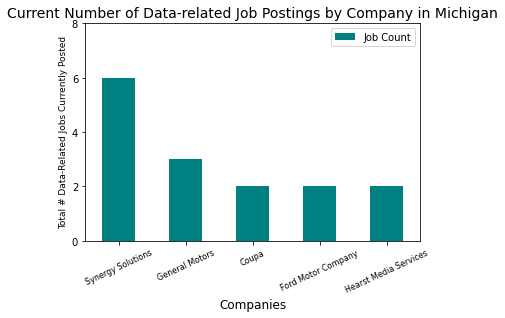

<Figure size 432x288 with 0 Axes>

In [27]:
# Bar Chart 2 - Jobs by Company in MI

# Group by Company
company_groupby = sorted_df.groupby("Company")

company_count = company_groupby["Title"].count()
location_first = company_groupby["Location"].first()

company_df = pd.DataFrame({"Job Count": company_count, 
                           "Location": location_first})

company_job_count = company_df.nlargest(5, "Job Count", keep="first")


# Plots the bar chart using pandas
measurements_bar = company_job_count.plot(kind="bar", 
                                          figsize=(6,4), 
                                          facecolor="teal", 
                                          align="center", 
                                          fontsize="8", 
                                          rot=25)
# Sets y-axis ticks 
plt.yticks(np.arange(0, 10, 2)) 
plt.xticks(size=8)
plt.yticks(size=10)

# Formats - title and axes
plt.title("Current Number of Data-related Job Postings "
          "by Company in Michigan", size=14)
plt.xlabel("Companies", size=12)
plt.ylabel("Total # Data-Related Jobs Currently Posted", size=9)

# Show and layout
plt.show()
plt.tight_layout()   

In [28]:
# Map the csv pathway
us_data_path = "Resources/input_folder/Indeed_US_Data Analyst_Jobs.csv"

# Reads the data and the study results
us_df = pd.read_csv(us_data_path)
us_df.head()

,index_num,title,location,company,summary,salary,url
0,0.0,Research Analyst 4 (Early Intervention/Infant ...,"Anchorage, AK",State of Alaska,"Data Management: Knowledge of the principles, ...","$6,000 - $6,301 a month",https://indeed.com/rc/clk?jk=43a9acac93b4eec9&...
1,1.0,Scientific Data Analyst,"Anchorage, AK 99513 (Fairview area)",CACI,"Analyzes data for reports, presentations and p...",NaN,https://indeed.com/rc/clk?jk=a9ceba7bbbdb959d&...
2,2.0,Clinical Data Analyst,"Kodiak, AK 99615",Kodiak Area Native Association,"Compile data to support grant reporting, accre...",NaN,https://indeed.com/rc/clk?jk=ef80bfc0a32665e1&...
3,3.0,Business Analyst,"Anchorage, AK 99503 (Midtown area)",Resource Data,You’ve been able to work with disparate busine...,NaN,https://indeed.com/rc/clk?jk=168be599095dd74b&...
4,4.0,Sr. Business Analyst,"Anchorage, AK 99503 (Midtown area)",Resource Data,You’ve attended a business analyst roundtable ...,NaN,https://indeed.com/rc/clk?jk=e130f5972ce5193e&...


In [29]:
# ~~~~~ Data cleaning ~~~~~
# Drops the job number, summary, and salary columns
clean_us_df = us_df.drop(["index_num", "summary", "salary"], axis=1)

# Makes all column headers titlecase
clean_us_df.columns = [x.title() for x in clean_us_df.columns]
clean_us_df

,Title,Location,Company,Url
0,Research Analyst 4 (Early Intervention/Infant ...,"Anchorage, AK",State of Alaska,https://indeed.com/rc/clk?jk=43a9acac93b4eec9&...
1,Scientific Data Analyst,"Anchorage, AK 99513 (Fairview area)",CACI,https://indeed.com/rc/clk?jk=a9ceba7bbbdb959d&...
2,Clinical Data Analyst,"Kodiak, AK 99615",Kodiak Area Native Association,https://indeed.com/rc/clk?jk=ef80bfc0a32665e1&...
3,Business Analyst,"Anchorage, AK 99503 (Midtown area)",Resource Data,https://indeed.com/rc/clk?jk=168be599095dd74b&...
4,Sr. Business Analyst,"Anchorage, AK 99503 (Midtown area)",Resource Data,https://indeed.com/rc/clk?jk=e130f5972ce5193e&...
...,...,...,...,...
6808,Content Development Analyst (Data Entry),"Laramie, WY 82072",UL,https://indeed.com/company/UL/jobs/Content-Dev...
6809,Real Estate Evaluation Analyst,"Casper, WY",Eval.com,https://indeed.com/pagead/clk?mo=r&ad=-6NYlbfk...
6810,Data Analyst II,United States,CoventBridge Group,https://indeed.com/pagead/clk?mo=r&ad=-6NYlbfk...
6811,Real Estate Evaluation Analyst,"Casper, WY",Eval.com,https://indeed.com/pagead/clk?mo=r&ad=-6NYlbfk...


In [30]:
# Gets count of ALL Data Analyst jobs posted on Indeed in US currently
count_data_analyst_us = len(clean_us_df["Title"])
print(f"There are {count_data_analyst_us} "
      "Data Analyst jobs currently posted in the US on Indeed.")

# For Loop gets count of REMOTE Data Analyst jobs posted 
# on Indeed in US currently

remote_count = 0
other_count = 0

for index, row in clean_us_df.iterrows():
    if "remote" in row["Title"].lower():
        remote_count += 1
    else:
        other_count += 1
        
print(f"There are {remote_count} remote jobs and " 
      f"{other_count} on-site jobs.")

There are 6813 Data Analyst jobs currently posted in the US on Indeed.
There are 490 remote jobs and 6323 on-site jobs.


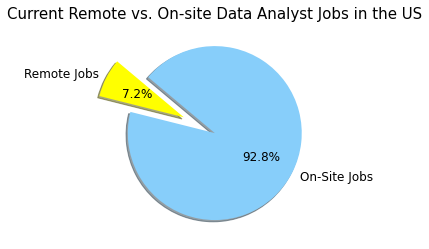

In [31]:
# Pie Chart - Current Remote vs. On-site Jobs in US posted on Indeed

# Labels the sections of our pie chart
labels = ["Remote Jobs", "On-Site Jobs"]

# Creates values for each section of the pie chart
sizes = [490, 6323]

# Creates colors for each section of the pie chart
colors = ["yellow", "lightskyblue"]

# Tells matplotlib to seperate the "Remote" section from the others
explode = (0.4, 0)

# Provides pie section labels
textprops = {"fontsize": 12}

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140, 
        textprops=textprops)

# Formats the title and axes
plt.title("Current Remote vs. On-site Data Analyst Jobs in the US",
          size=15)
plt.show()